# Explore here

It's recommended to use this notebook for exploration purposes.

In [30]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd




In [31]:
# 3. Transformar el HTML
#  Buscar todas las tablas
tables = soup.find_all("table")
#tables
# Almacenar datos en un DataFrame
for index, table in enumerate(tables):
    if ("Tipo" in str(table)):
        table_index = index
        break
#  Crear DataFrame
leucocito = pd.DataFrame(columns = ["Tipo", "Apariencia microscópica", "Diagrama", "Porcentaje en adultos","Diámetro","Objetivo","Núcleo","Gránulos","Vida media"])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Tipo = col[0].text
        Apariencia = col[1].text.replace("$", "").replace(",", "")
        Diagrama = col[2].text.replace("$", "").replace(",", "")
        Porcentaje = col[3].text
        Diametro = col[4].text
        Objetivo = col[5].text
        Nucleo = col[6].text
        Granulos = col[7].text
        Vida = col[8].text
        leucocito = pd.concat([leucocito, pd.DataFrame({
            "Tipo": Tipo,
            "Apariencia microscópica": Apariencia,
            "Diagrama": Diagrama,
            "Porcentaje en adultos": Porcentaje,
            "Diámetro": Diametro,
            "Objetivo": Objetivo,
            "Núcleo": Nucleo,
            "Gránulos": Granulos,
            "Vida media": Vida
        }, index = [0])], ignore_index = True)

leucocito.head()

,Tipo,Apariencia microscópica,Diagrama,Porcentaje en adultos,Diámetro,Objetivo,Núcleo,Gránulos,Vida media
0,Neutrófilo,,,62%,10-12,\nBacterias\nHongos\nVirus\n,Multilobulado,"Fino, ligeramente rosado (tinción HyE)","6 horas-unos cuantos días, dura días en bazo y..."
1,Eosinófilo,,,2.3%,10-12,\nMacroparásitos\nModulan respuesta alérgica i...,Bi-lobulado,Se encuentran en un color rosa-anaranjado,8–12 días; circulan por 4 o 5 horas en el torr...
2,Basófilo,,,0.4%,12-15,Liberan histamina para respuesta inflamatoria,Bi-lobulado o tri-lobulado,Azul oscuro,De pocas horas hasta pocos días\n
3,Linfocito,,,30%,Linfocitos pequeños: 7–8 Linfocitos grandes: 1...,\nLinfocitos B: libera anticuerpos y coopera p...,Es excéntrico y se tiñe fuertemente,Células NK y células CD8 citotóxicas,"Años, para células de memoria; y semanas para ..."
4,Monocito,,,5.3%,12-15[8]​,Los monocitos migran desde el torrente sanguín...,Arriñonado,Ninguno,De horas a días\n


In [32]:
# 4. Procesar el DataFrame
# Elimino las columnas 1 y 2 que están vacías (porque contenían imágenes)
# Elimino otras columnas, que aunque tienen contenido, no me son útiles a la hora de graficar
leucocito = leucocito.drop(["Apariencia microscópica", "Diagrama","Diámetro","Objetivo","Núcleo","Gránulos","Vida media"], axis=1)
leucocito

,Tipo,Porcentaje en adultos
0,Neutrófilo,62%
1,Eosinófilo,2.3%
2,Basófilo,0.4%
3,Linfocito,30%
4,Monocito,5.3%


In [33]:
# 5. Almacenar datos en sqlite
connection = sqlite3.connect("Leucocito.db")
connection
cursor = connection.cursor()

In [34]:
cursor.execute("""DROP TABLE leucocitos""") #Para que no me de error al ejecutar todo

In [35]:
cursor.execute("""CREATE TABLE leucocitos (Tipo, Porcentaje en adultos)""")

In [36]:
leucocito_tuples = list(leucocito.to_records(index = False))
leucocito_tuples[:5]

[('Neutrófilo', '62%'),
 ('Eosinófilo', '2.3%'),
 ('Basófilo', '0.4%'),
 ('Linfocito', '30%'),
 ('Monocito', '5.3%')]

In [37]:
# Almacenar los cambios
cursor.executemany("INSERT INTO leucocito5 VALUES (?,?)", leucocito_tuples)
connection.commit()

for row in cursor.execute("SELECT * FROM leucocito5"):
    print(row)

('Neutrófilo', '62%')
('Eosinófilo', '2.3%')
('Basófilo', '0.4%')
('Linfocito', '30%')
('Monocito', '5.3%')
('Neutrófilo', '62%')
('Eosinófilo', '2.3%')
('Basófilo', '0.4%')
('Linfocito', '30%')
('Monocito', '5.3%')
('Neutrófilo', '62%')
('Eosinófilo', '2.3%')
('Basófilo', '0.4%')
('Linfocito', '30%')
('Monocito', '5.3%')
('Neutrófilo', '62%')
('Eosinófilo', '2.3%')
('Basófilo', '0.4%')
('Linfocito', '30%')
('Monocito', '5.3%')


In [38]:
# 6. Visualización de datos

# Preparación de los datos
#   Quito el '%' de la columna "Porcentaje para adultos"
leucocito_float = leucocito["Porcentaje en adultos"].str.replace("%", "")
#   Convierto la nueva columna en numérico
leucocito_float_numerico = pd.to_numeric(leucocito_float)
#   Sustituyo la nueva columna por la original
leucocito["Porcentaje en adultos"]= leucocito_float_numerico
leucocito


,Tipo,Porcentaje en adultos
0,Neutrófilo,62.0
1,Eosinófilo,2.3
2,Basófilo,0.4
3,Linfocito,30.0
4,Monocito,5.3


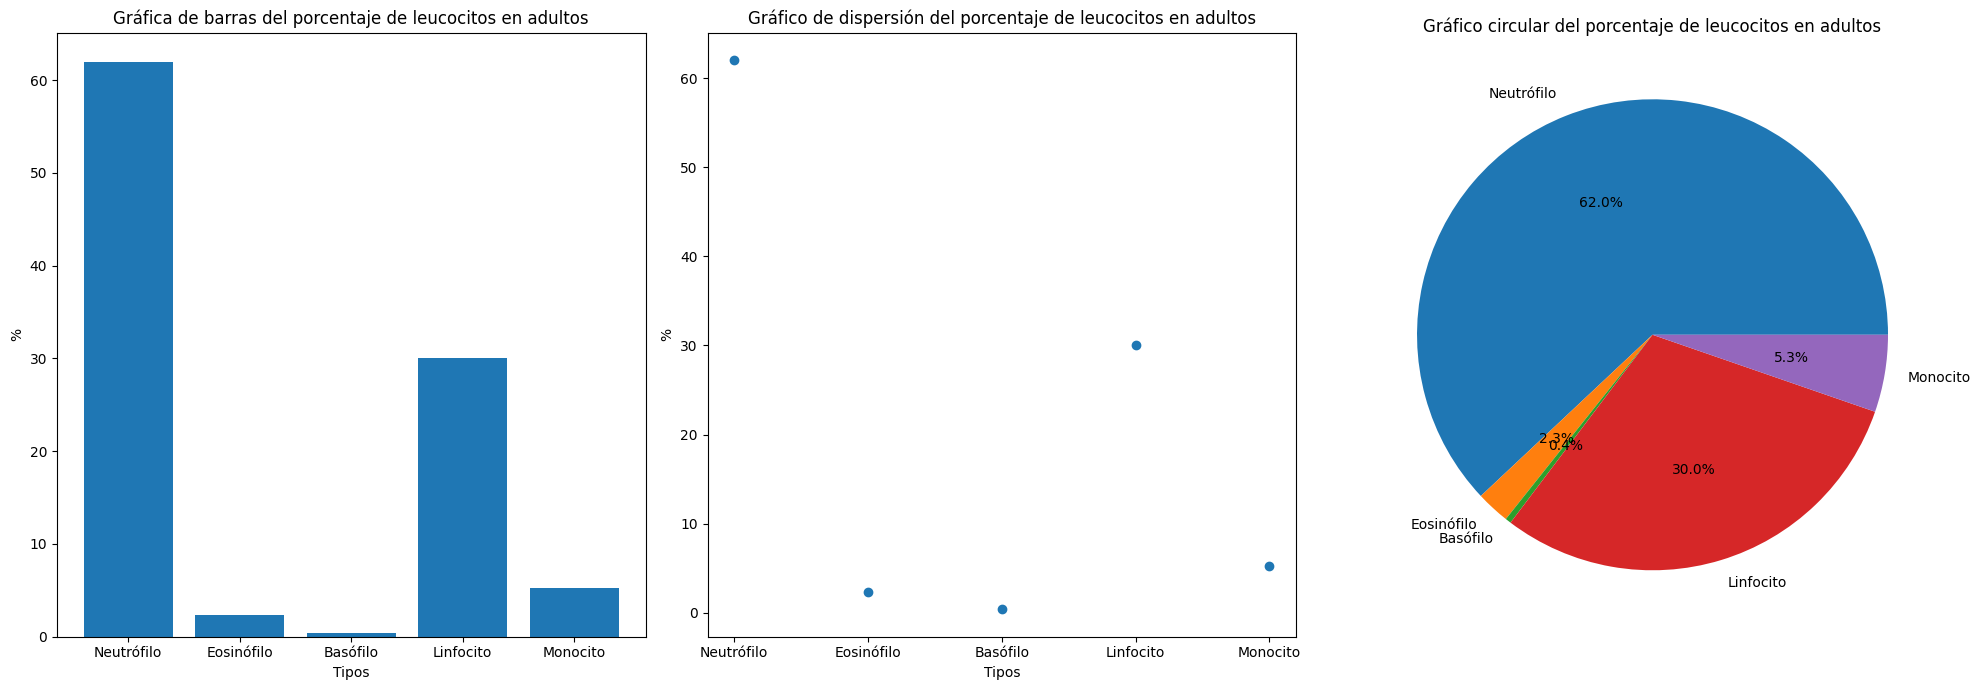

In [54]:
#leucocito_ordenado = leucocito_float.sort_values(by="Porcentaje en adultos")
fig, axs = plt.subplots(1,3, figsize = (20, 7))

tipos = leucocito["Tipo"] 
porcentajes = leucocito["Porcentaje en adultos"]

axs[0].bar(tipos, porcentajes)
axs[0].set_title('Gráfica de barras del porcentaje de leucocitos en adultos')
axs[0].set_xlabel('Tipos')
axs[0].set_ylabel('%')
axs[1].scatter(tipos, porcentajes)
axs[1].set_title('Gráfico de dispersión del porcentaje de leucocitos en adultos')
axs[1].set_xlabel('Tipos')
axs[1].set_ylabel('%')
axs[2].pie(porcentajes, labels = tipos, autopct='%1.1f%%')
axs[2].set_title('Gráfico circular del porcentaje de leucocitos en adultos')


plt.tight_layout()

plt.show()